<h1 style="text-align:center;margin:50px 0">K-Nearest Neighbors (Pro)</h1>

### Import required modules

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

### Read dataset

In [121]:
iris = load_iris()

### Creating Dataframe

In [98]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [123]:
df.head()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Understanding dataset

In [97]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [104]:
print(df.shape)

(150, 5)


In [114]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [111]:
df["target"].nunique()

3

### Features and target selection

In [128]:
X, y = iris.data[:, 2:], iris.target

### Dataset train-test splitting

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training

In [130]:
pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

In [131]:
param_grid = {
    'knn__n_neighbors': np.arange(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

In [132]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [133]:
best_model = grid_search.best_estimator_

### Evaluation

In [134]:
y_pred = best_model.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualization

In [136]:
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

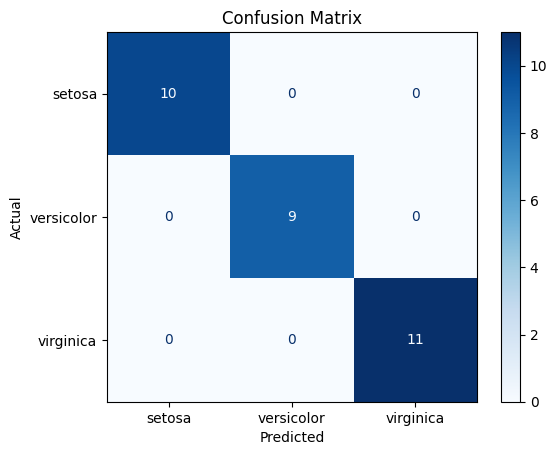

In [137]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot(cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

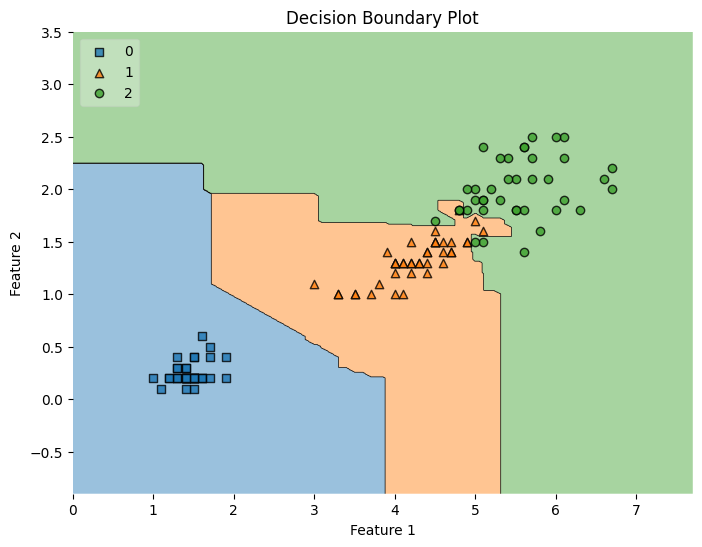

In [138]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=best_model, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary Plot")
plt.show()

### Prediction

In [141]:
labels = ("Iris-Setosa", "Iris-Versicolour", "Iris-Virginica")
res = best_model.predict([X_test[0]])[0]
print(labels[res])

Iris-Versicolour
